<a href="https://colab.research.google.com/github/FeerOT/DataLab/blob/main/Colab_datalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
# Autenticación en Google Cloud
auth.authenticate_user()
# Configuración del proyecto de Google Cloud
project_id = "datalab-410116"
client = bigquery.Client(project=project_id)
# Consulta en BigQuery para obtener los datos necesarios
query = """
SELECT
  review_content_limpio
FROM
  `datalab-410116.datos.amazon_limpia`
"""
# ...
# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)
results = list(query_job.result())  # Convertir resultados a lista
# Inicializa una lista para almacenar los resultados del análisis de sentimientos
sentiments = []
# Analiza el sentimiento para cada revisión y almacena los resultados
sia = SentimentIntensityAnalyzer()
for row in results:
    content = row["review_content_limpio"]
    sentiment_score = sia.polarity_scores(content)["compound"]
    sentiments.append(sentiment_score)
# Crea un DataFrame con los resultados
df = pd.DataFrame({
    "review_content_limpio": [row["review_content_limpio"] for row in results],
    "sentiment_score": sentiments
})
# Imprime el DataFrame
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                               review_content_limpio  sentiment_score
0  It cost should be under Rs  500 Buy it Color i...           0.9933
1  It s a good data cable and I recommend it to p...           0.9794
2  Light weight Product is compact and goog looki...           0.9061
3  Its worth it At this price the product is very...           0.9954
4  Samsung offers super fast charging at 25 watt ...           0.9568


In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = "datalab-410116"
client = bigquery.Client(project=project_id)

# Consulta en BigQuery para obtener los datos necesarios
query = """
SELECT
  review_content_limpio,
FROM
  `datalab-410116.datos.amazon_limpia`
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)
results = list(query_job.result())

# Inicializa una lista para almacenar los resultados del análisis de sentimientos
sentiments = []

# Analiza el sentimiento para cada revisión y almacena los resultados
sia = SentimentIntensityAnalyzer()
for row in results:
    content = row["review_content_limpio"]
    sentiment_score = sia.polarity_scores(content)["compound"]
    sentiments.append(sentiment_score)

# Crea un DataFrame con los resultados
df = pd.DataFrame({
    "review_content_limpio": [row["review_content_limpio"] for row in results],
    "sentiment_score": sentiments
})

# Agrega la columna "sentiment_score" a la tabla en BigQuery
table_id = "datos.amazon_limpia"  # Reemplaza con tu ID de tabla completo
table_ref = client.dataset("datos").table("amazon_limpia")  # Reemplaza con tu ID de conjunto de datos
table = client.get_table(table_ref)

# Agrega la columna "sentiment_score" si no existe
schema = table.schema
if "sentiment_score" not in [field.name for field in schema]:
    new_field = bigquery.SchemaField("sentiment_score", "FLOAT")
    schema.append(new_field)
    table.schema = schema
    client.update_table(table, ["schema"])

# Actualiza los datos en BigQuery con la nueva columna
job_config = bigquery.LoadJobConfig(
    schema=[bigquery.SchemaField("sentiment_score", "FLOAT")],
    write_disposition="WRITE_TRUNCATE"  # Esto puede ser ajustado según tus necesidades
)

client.load_table_from_dataframe(df, table_ref, job_config=job_config).result()
# Crea un DataFrame temporal con la nueva columna
df_temporal = pd.DataFrame({
    "review_content_limpio": [row["review_content_limpio"] for row in results],
    "sentiment_score": sentiments
})

# Carga la tabla temporal a BigQuery
table_temporal_id = "amazon_limpia"  # Reemplaza con tu ID de tabla temporal
table_temporal_ref = client.dataset("amazon").table("limpia")  # Reemplaza con tu ID de conjunto de datos temporal
job_config_temporal = bigquery.LoadJobConfig(
    schema=[bigquery.SchemaField("sentiment_score", "FLOAT")],
    write_disposition="WRITE_TRUNCATE"
)
client.load_table_from_dataframe(df_temporal, table_temporal_ref, job_config=job_config_temporal).result()

# Crea una nueva tabla con el esquema actualizado
table_id = "datos.amazon_limpia"  # Reemplaza con tu ID de tabla completo
table_ref = client.dataset("datos").table("amazon_limpia")  # Reemplaza con tu ID de conjunto de datos
new_field = bigquery.SchemaField("sentiment_score", "FLOAT")
schema = table.schema + [new_field]
new_table = bigquery.Table(table_ref, schema=schema)
client.create_table(new_table, exists_ok=True)

# Carga datos desde la tabla temporal a la nueva tabla
job_config_final = bigquery.LoadJobConfig(
    write_disposition="WRITE_TRUNCATE"
)
client.copy_table(table_temporal_ref, table_ref, job_config=job_config_final).result()



BadRequest: 400 PATCH https://bigquery.googleapis.com/bigquery/v2/projects/datalab-410116/datasets/datos/tables/amazon_limpia?prettyPrint=false: Provided Schema does not match Table datalab-410116:datos.amazon_limpia. Cannot add fields (field: sentiment_score)

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = "datalab-410116"
client = bigquery.Client(project=project_id)

# Consulta en BigQuery para obtener los datos necesarios
query = """
SELECT
  review_content_limpio
FROM
  `datalab-410116.datos.amazon_limpia`
"""

# Ejecuta la consulta y obtén los resultados
query_job = client.query(query)
results = list(query_job.result())

# Inicializa una lista para almacenar los resultados del análisis de sentimientos
sentiments = []

# Analiza el sentimiento para cada revisión y almacena los resultados
sia = SentimentIntensityAnalyzer()
for row in results:
    content = row["review_content_limpio"]
    sentiment_score = sia.polarity_scores(content)["compound"]
    sentiments.append(sentiment_score)

# Crea un DataFrame con los resultados y agrega la nueva columna
df = pd.DataFrame({
    "review_content_limpio": [row["review_content_limpio"] for row in results],
    "sentiment_score": sentiments
})

# Crea la tabla temporal con la nueva columna
table_temporal_id = "temporal"  # Reemplaza con tu ID de tabla temporal
table_temporal_ref = client.dataset("datos").table(table_temporal_id)
job_config_temporal = bigquery.LoadJobConfig(
    schema=[bigquery.SchemaField("sentiment_score", "FLOAT64")],
    write_disposition="WRITE_TRUNCATE"
)
client.load_table_from_dataframe(df, table_temporal_ref, job_config=job_config_temporal).result()

# Recrea la vista con la nueva columna
sql_statement = f"""
CREATE OR REPLACE VIEW `datalab-410116.datos.amazon_limpia` AS
SELECT
  review_content_limpio,
  sentiment_score
FROM
  `datalab-410116.datos.{table_temporal_id}`
"""
client.query(sql_statement).result()


In [ ]:
from scipy.stats import kruskal
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = "datalab-410116"
client = bigquery.Client(project=project_id)

# Ejemplo de consulta para obtener datos de BigQuery
query = """
SELECT discounted_price, rating_count
FROM `datos.AmzSalesData`
"""

# Ejecutar la consulta y obtener los datos
result = client.query(query).to_dataframe()

# Verificar y explorar los datos
print(result.head())

# Ejemplo de más de dos muestras independientes
stat, p_value = kruskal(result['discounted_price'], result['rating_count'])
print(f"Estadística de prueba H: {stat}")
print(f"Valor p: {p_value}")


   discounted_price  rating_count
0              1999         63899
1               119         15032
2               299           903
3               721          2449
4               499            79
Estadística de prueba H: 315.0303592821003
Valor p: 1.7515507122645947e-70


In [ ]:
from scipy.stats import kruskal
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = "datalab-410116"
client = bigquery.Client(project=project_id)

# Ejemplo de consulta para obtener datos de BigQuery
query = """
SELECT *
FROM `datos.AmzSalesData`
"""

# Ejecutar la consulta y obtener los datos
result = client.query(query).to_dataframe()

# Verificar y explorar los datos
print(result.head())

# Ejemplo de más de dos muestras independientes
stat, p_value = kruskal(result['actual_price'], result['discount_percentage'])
print(f"Estadística de prueba H: {stat}")
print(f"Valor p: {p_value}")


   product_id                                       product_name  \
0  B08LPJZSSW  DIGITEK® (DTR 260 GT) Gorilla Tripod/Mini 33 c...   
1  B0BNDD9TN6  WANBO X1 Pro (Upgraded) | Native 1080P Full HD...   
2  B00LM4X3XE                    Parker Quink Ink Bottle (Black)   
3  B082ZQ4479  Prestige PWG 07 Wet Grinder, 2L (Multicolor) w...   
4  B06XPYRWV5  Pigeon by Stovekraft 2 Slice Auto Pop up Toast...   

                                            category     subcategory  \
0  Electronics|Cameras&Photography|Accessories|Tr...     Electronics   
1        Electronics|HomeTheater,TV&Video|Projectors     Electronics   
2  OfficeProducts|OfficePaperProducts|Paper|Stati...  OfficeProducts   
3  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...    Home&Kitchen   
4  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...    Home&Kitchen   

   actual_price  cuartil_actual_price cat_actual_price  discounted_price  \
0           995                     2             Bajo               399   
1     

In [ ]:
from scipy.stats import kruskal
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = "datalab-410116"
client = bigquery.Client(project=project_id)

# Ejemplo de consulta para obtener datos de BigQuery
query = """
SELECT *
FROM `datos.AmzSalesData`
"""

# Ejecutar la consulta y obtener los datos
result = client.query(query).to_dataframe()

# Verificar y explorar los datos
print(result.head())

# Ejemplo de más de dos muestras independientes
stat, p_value = kruskal(result['sentiment_score'], result['rating'])
print(f"Estadística de prueba H: {stat}")
print(f"Valor p: {p_value}")



   product_id                                       product_name  \
0  B08LPJZSSW  DIGITEK® (DTR 260 GT) Gorilla Tripod/Mini 33 c...   
1  B0BNDD9TN6  WANBO X1 Pro (Upgraded) | Native 1080P Full HD...   
2  B00LM4X3XE                    Parker Quink Ink Bottle (Black)   
3  B082ZQ4479  Prestige PWG 07 Wet Grinder, 2L (Multicolor) w...   
4  B06XPYRWV5  Pigeon by Stovekraft 2 Slice Auto Pop up Toast...   

                                            category     subcategory  \
0  Electronics|Cameras&Photography|Accessories|Tr...     Electronics   
1        Electronics|HomeTheater,TV&Video|Projectors     Electronics   
2  OfficeProducts|OfficePaperProducts|Paper|Stati...  OfficeProducts   
3  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...    Home&Kitchen   
4  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...    Home&Kitchen   

   actual_price  cuartil_actual_price cat_actual_price  discounted_price  \
0           995                     2             Bajo               399   
1     

In [ ]:
from scipy.stats import kruskal
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación en Google Cloud
auth.authenticate_user()

# Configuración del proyecto de Google Cloud
project_id = "datalab-410116"
client = bigquery.Client(project=project_id)

# Ejemplo de consulta para obtener datos de BigQuery
query = """
SELECT *
FROM `datos.AmzSalesData`
"""

# Ejecutar la consulta y obtener los datos
result = client.query(query).to_dataframe()

# Verificar y explorar los datos
print(result.head())

# Ejemplo de más de dos muestras independientes
stat, p_value = kruskal(result['actual_price'], result['sentiment_score'])
print(f"Estadística de prueba H: {stat}")
print(f"Valor p: {p_value}")


   product_id                                       product_name  \
0  B08LPJZSSW  DIGITEK® (DTR 260 GT) Gorilla Tripod/Mini 33 c...   
1  B0BNDD9TN6  WANBO X1 Pro (Upgraded) | Native 1080P Full HD...   
2  B00LM4X3XE                    Parker Quink Ink Bottle (Black)   
3  B082ZQ4479  Prestige PWG 07 Wet Grinder, 2L (Multicolor) w...   
4  B06XPYRWV5  Pigeon by Stovekraft 2 Slice Auto Pop up Toast...   

                                            category     subcategory  \
0  Electronics|Cameras&Photography|Accessories|Tr...     Electronics   
1        Electronics|HomeTheater,TV&Video|Projectors     Electronics   
2  OfficeProducts|OfficePaperProducts|Paper|Stati...  OfficeProducts   
3  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...    Home&Kitchen   
4  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...    Home&Kitchen   

   actual_price  cuartil_actual_price cat_actual_price  discounted_price  \
0           995                     2             Bajo               399   
1     

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "datalab-410116"
query = "SELECT * FROM `datalab-410116.datos.AmzSalesData`"  # Incluye solo las columnas relevantes
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro para discounted_price
columna_descuento = 'discounted_price'
datos_descuento = df[columna_descuento].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro para discounted_price
estadistico_shapiro_descuento, p_valor_descuento = shapiro(datos_descuento)
# Imprime los resultados para discounted_price
print(f'Estadístico de Shapiro para discounted_price: {estadistico_shapiro_descuento}')
print(f'P-valor para discounted_price: {p_valor_descuento}')
# Selecciona la columna de interés para aplicar el test de Shapiro para rating_count
columna_calificaciones = 'rating_count'
datos_calificaciones = df[columna_calificaciones].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro para rating_count
estadistico_shapiro_calificaciones, p_valor_calificaciones = shapiro(datos_calificaciones)
# Imprime los resultados para rating_count
print(f'Estadístico de Shapiro para rating_count: {estadistico_shapiro_calificaciones}')
print(f'P-valor para rating_count: {p_valor_calificaciones}')
# Interpreta los resultados para discounted_price
alpha = 0.05
if p_valor_descuento > alpha:
    print('No se rechaza la hipótesis nula para discounted_price. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula para discounted_price. Los datos no siguen una distribución normal.')
# Interpreta los resultados para rating_count
if p_valor_calificaciones > alpha:
    print('No se rechaza la hipótesis nula para rating_count. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula para rating_count. Los datos no siguen una distribución normal.')

Estadístico de Shapiro para discounted_price: 0.4017055034637451
P-valor para discounted_price: 0.0
Estadístico de Shapiro para rating_count: 0.4201014041900635
P-valor para rating_count: 0.0
Se rechaza la hipótesis nula para discounted_price. Los datos no siguen una distribución normal.
Se rechaza la hipótesis nula para rating_count. Los datos no siguen una distribución normal.


In [ ]:
from scipy.stats import wilcoxon
import pandas as pd
# Especifica tu proyecto y configuración de BigQuery
project_id = "datalab-410116"
query = "SELECT discounted_price, rating_count FROM `datalab-410116.datos.AmzSalesData`"  # Ajusta la consulta SQL según tus necesidades
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Supongamos que quieres comparar dos grupos de datos independientes
grupo1 = df['discounted_price']
grupo2 = df['rating_count']
# Aplica la Prueba de Wilcoxon
estadistico_wilcoxon, p_valor_wilcoxon = wilcoxon(grupo1, grupo2)
# Imprime los resultados
print(f'Estadístico de la Prueba de Wilcoxon: {estadistico_wilcoxon}')
print(f'P-valor para la Prueba de Wilcoxon: {p_valor_wilcoxon}')
# Interpreta los resultados
alpha = 0.05
if p_valor_wilcoxon > alpha:
    print('No se rechaza la hipótesis nula. No hay evidencia suficiente para afirmar que hay una diferencia significativa.')
else:
    print('Se rechaza la hipótesis nula. Hay evidencia significativa para afirmar que hay una diferencia entre los grupos.')

Estadístico de la Prueba de Wilcoxon: 137571.0
P-valor para la Prueba de Wilcoxon: 8.87058766884398e-74
Se rechaza la hipótesis nula. Hay evidencia significativa para afirmar que hay una diferencia entre los grupos.


Error Cuadrático Medio en el conjunto de prueba: 1707853190.1675158


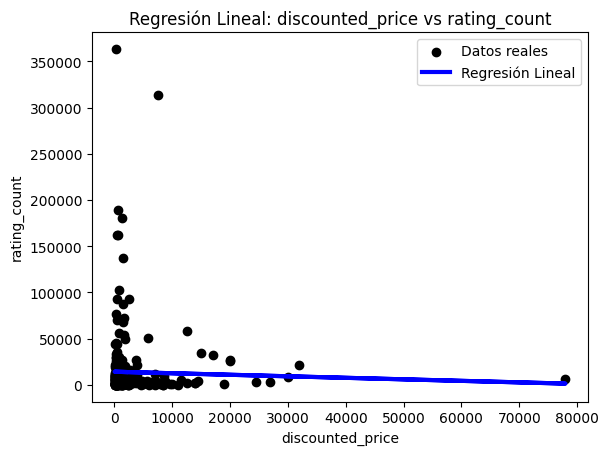

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Especifica tu proyecto y configuración de BigQuery
project_id = "datalab-410116"
query = "SELECT discounted_price, rating_count FROM `datalab-410116.datos.AmzSalesData`"  # Ajusta la consulta SQL según tus necesidades
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Seleccionar las variables de interés
df = df[['discounted_price', 'rating_count']]
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['discounted_price']]
y = df['rating_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear un modelo de regresión lineal
model = LinearRegression()
# Entrenar el modelo
model.fit(X_train, y_train)
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")
# Visualizar los resultados
plt.scatter(X_test, y_test, color='black', label='Datos reales')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Regresión Lineal')
plt.xlabel('discounted_price')
plt.ylabel('rating_count')
plt.title('Regresión Lineal: discounted_price vs rating_count')
plt.legend()
plt.show()

In [ ]:
from google.cloud import bigquery
from scipy.stats import pearsonr
import numpy as np

# Configurar el cliente de BigQuery (reemplazar 'tu-proyecto' con el nombre de tu proyecto)
client = bigquery.Client(project='datalab-410116')
# Especificar la consulta (reemplazar 'tu-dataset.tu-tabla' con tus propios datos)
query = """
SELECT discounted_price, rating
FROM `datalab-410116.datos.AmzSalesData`
"""
# Ejecutar la consulta y obtener los resultados en un DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()

# Eliminar filas con valores NaN
df = df.dropna(subset=['discounted_price', 'rating'])

# Eliminar filas con valores infinitos
df = df[np.isfinite(df['discounted_price']) & np.isfinite(df['rating'])]

# Calcular la correlación de Pearson y realizar la prueba de significancia
r, p_value = pearsonr(df['discounted_price'], df['rating'])
# Imprimir los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")


Correlación de Pearson: 0.11947390869165568
Valor p: 3.736688269781029e-05
Se rechaza la hipótesis nula. Hay una correlación significativa.


In [ ]:
from google.cloud import bigquery
from scipy.stats import pearsonr
# Configurar el cliente de BigQuery (reemplazar 'tu-proyecto' con el nombre de tu proyecto)
client = bigquery.Client(project='datalab-410116')
# Especificar la consulta (reemplazar 'tu-dataset.tu-tabla' con tus propios datos)
query = """
SELECT actual_price, discount_percentage
FROM `datalab-410116.datos.AmzSalesData`
"""
# Ejecutar la consulta y obtener los resultados en un DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()
# Calcular la correlación de Pearson y realizar la prueba de significancia
r, p_value = pearsonr(df['discount_percentage'], df['actual_price'])
# Imprimir los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")
# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: -0.05739896745437931
Valor p: 0.04812411231476601
Se rechaza la hipótesis nula. Hay una correlación significativa.


In [ ]:
from google.cloud import bigquery
from scipy.stats import pearsonr
# Configurar el cliente de BigQuery (reemplazar 'tu-proyecto' con el nombre de tu proyecto)
client = bigquery.Client(project='datalab-410116')
# Especificar la consulta (reemplazar 'tu-dataset.tu-tabla' con tus propios datos)
query = """
SELECT sentiment_score, rating
FROM `datalab-410116.datos.AmzSalesData`
"""
# Ejecutar la consulta y obtener los resultados en un DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()
# Eliminar filas con valores faltantes
df = df.dropna()
# Calcular la correlación de Pearson y realizar la prueba de significancia
r, p_value = pearsonr(df['rating'], df['sentiment_score'])
# Imprimir los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")
# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: 0.22818642311607984
Valor p: 1.83676656165425e-15
Se rechaza la hipótesis nula. Hay una correlación significativa.


In [ ]:
from google.cloud import bigquery
from scipy.stats import pearsonr
# Configurar el cliente de BigQuery (reemplazar 'tu-proyecto' con el nombre de tu proyecto)
client = bigquery.Client(project='datalab-410116')
# Especificar la consulta (reemplazar 'tu-dataset.tu-tabla' con tus propios datos)
query = """
SELECT sentiment_score, actual_price
FROM `datalab-410116.datos.AmzSalesData`
"""
# Ejecutar la consulta y obtener los resultados en un DataFrame
query_job = client.query(query)
df = query_job.to_dataframe()
# Eliminar filas con valores faltantes
df = df.dropna()
# Calcular la correlación de Pearson y realizar la prueba de significancia
r, p_value = pearsonr(df['sentiment_score'], df['actual_price'])
# Imprimir los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")
# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: 0.03247860040271032
Valor p: 0.26372725617971127
No hay suficiente evidencia para rechazar la hipótesis nula.
